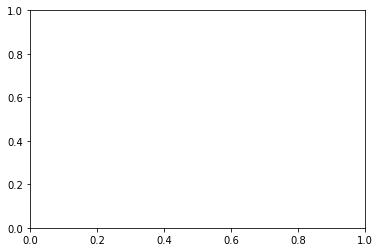

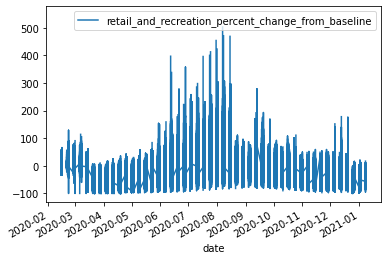

Index(['date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'location', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand'],
      dtype='object')

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("Global_Mobility_Report_sample.csv", sep=",")
df1['date'] = pd.to_datetime(df1['date'])
df2 = pd.read_csv("owid-covid-data.csv", sep=",")
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2[(df2.continent.eq("Europe")) & (df2['date'].dt.weekday >3)]
european_country = pd.unique(df2.location)
df1 = df1[(df1.country_region.isin(european_country)) & (df1['date'].dt.weekday >3)]

j = pd.merge(left=df1, right=df2, left_on=['date', 'country_region'], right_on=['date', 'location'])
j = j.drop(columns = ['country_region_code', 'sub_region_1', 'sub_region_2', 'iso_3166_2_code', 'metro_area', 'census_fips_code', 'continent', 'total_vaccinations_per_hundred', 'extreme_poverty', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'reproduction_rate', 'total_vaccinations', 'country_region', 'aged_70_older', 'aged_65_older', 'stringency_index', 'human_development_index', 'life_expectancy', 'handwashing_facilities', 'new_vaccinations_per_million', 'new_vaccinations', 'female_smokers', 'male_smokers', 'cardiovasc_death_rate', 'diabetes_prevalence', 'population', 'hospital_beds_per_thousand', 'population_density', 'median_age', 'iso_code', 'hosp_patients', 'weekly_hosp_admissions_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'hosp_patients_per_million', 'positive_rate', 'tests_per_case', 'tests_units', 'gdp_per_capita'])

plt.subplot()
j.plot(kind = 'line', x='date',y='retail_and_recreation_percent_change_from_baseline')
plt.show()
j.columns